In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('../../02_dataset/merged_df.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.sample(15)

,ISO3_code,Year,country,yearly_avg_rainfall,rainfall_var_t,rainfall_var_t_1,yearly_avg_temp,temp_var_t,temp_var_t_1,pt_gdp_agriculture,...,gdp_pchange,gdp_percap,gdp_percap_pchange,unemp_rate,unemp_rate_pchange,gini,gini_pchange,population,participants,protest_fraction
8177,TZA,2018,Tanzania,859.635864,0.089284,-0.109331,227.916392,-0.017936,0.002939,27.868599,...,5.468085,3392.6887,2.208607,2.409,4.150454,0.404912,5.945966,NaN,NaN,NaN
7701,ESP,2009,Spain,527.041069,-0.110352,0.232713,139.025917,0.035618,-0.000902,2.249602,...,-3.768135,42671.5200,-4.616730,17.857,58.658374,0.349241,2.056329,46362946.0,72000.0,0.001553
4576,LAO,1987,Laos,1402.304113,-0.176364,0.125395,238.958874,0.032336,0.002625,51.852707,...,-1.425789,2005.5005,0.000000,0.708,0.000000,0.353252,0.000000,NaN,NaN,NaN
1914,CIV,1998,Cote d'Ivoire,959.070872,0.012967,-0.128998,272.897196,0.019360,-0.001351,15.541618,...,4.263908,5093.1320,0.404822,4.100,3.404792,0.389574,-1.911564,NaN,NaN,NaN
3599,GUY,2017,Guyana,1999.250000,0.046618,0.039664,265.947304,-0.002221,-0.006246,22.758026,...,3.734486,12801.6410,3.068877,13.813,1.843250,0.422535,0.000000,NaN,NaN,NaN
5033,MDG,1992,Madagascar,1298.685458,0.098366,0.198049,222.914216,0.000394,0.000328,34.959667,...,1.180880,1763.4319,-1.818436,6.251,1.807818,0.427936,0.000000,NaN,NaN,NaN
2407,TLS,1979,East Timor,1083.100000,-0.275001,0.355902,250.000000,0.005969,0.025304,32.204285,...,0.000000,2136.7056,0.000000,1.523,0.000000,0.308038,0.000000,NaN,NaN,NaN
5675,MMR,2015,Myanmar,1552.166319,0.202744,-0.213727,236.175000,0.001522,0.006345,26.771778,...,6.992835,5313.8860,6.139590,0.766,2.269693,0.380685,10.719987,51089056.0,950.0,0.000019
3228,GHA,1966,Ghana,1033.295267,-0.027094,0.022325,272.725309,0.012354,0.001373,43.280632,...,-4.258288,2785.6711,0.000000,2.173,0.000000,0.397848,0.000000,NaN,NaN,NaN
7828,SDN,2006,Sudan,205.607046,0.027573,0.279321,280.129404,-0.013139,0.008783,31.820108,...,6.531417,4299.9740,3.555870,14.783,-0.054087,0.348189,0.000000,NaN,NaN,NaN


In [8]:
df.country.nunique()

156

In [7]:
# find sample countries, those with high pt_gdp_agriculture, and with protest data

sub_df=df.dropna(subset='protest_fraction').copy()
sub_df.country.nunique()

136

In [16]:
high_ag = sub_df[sub_df['pt_gdp_agriculture']>50]['country'].unique().tolist()
med_ag = sub_df[sub_df['pt_gdp_agriculture']>20]['country'].unique().tolist()
med_ag = [x for x in med_ag if x not in high_ag]
low_ag = sub_df[sub_df['pt_gdp_agriculture']<20]['country'].unique().tolist()

In [ ]:
#play around with countries with high ag first
high_df= sub_df[sub_df['country'].isin(high_ag)].copy()

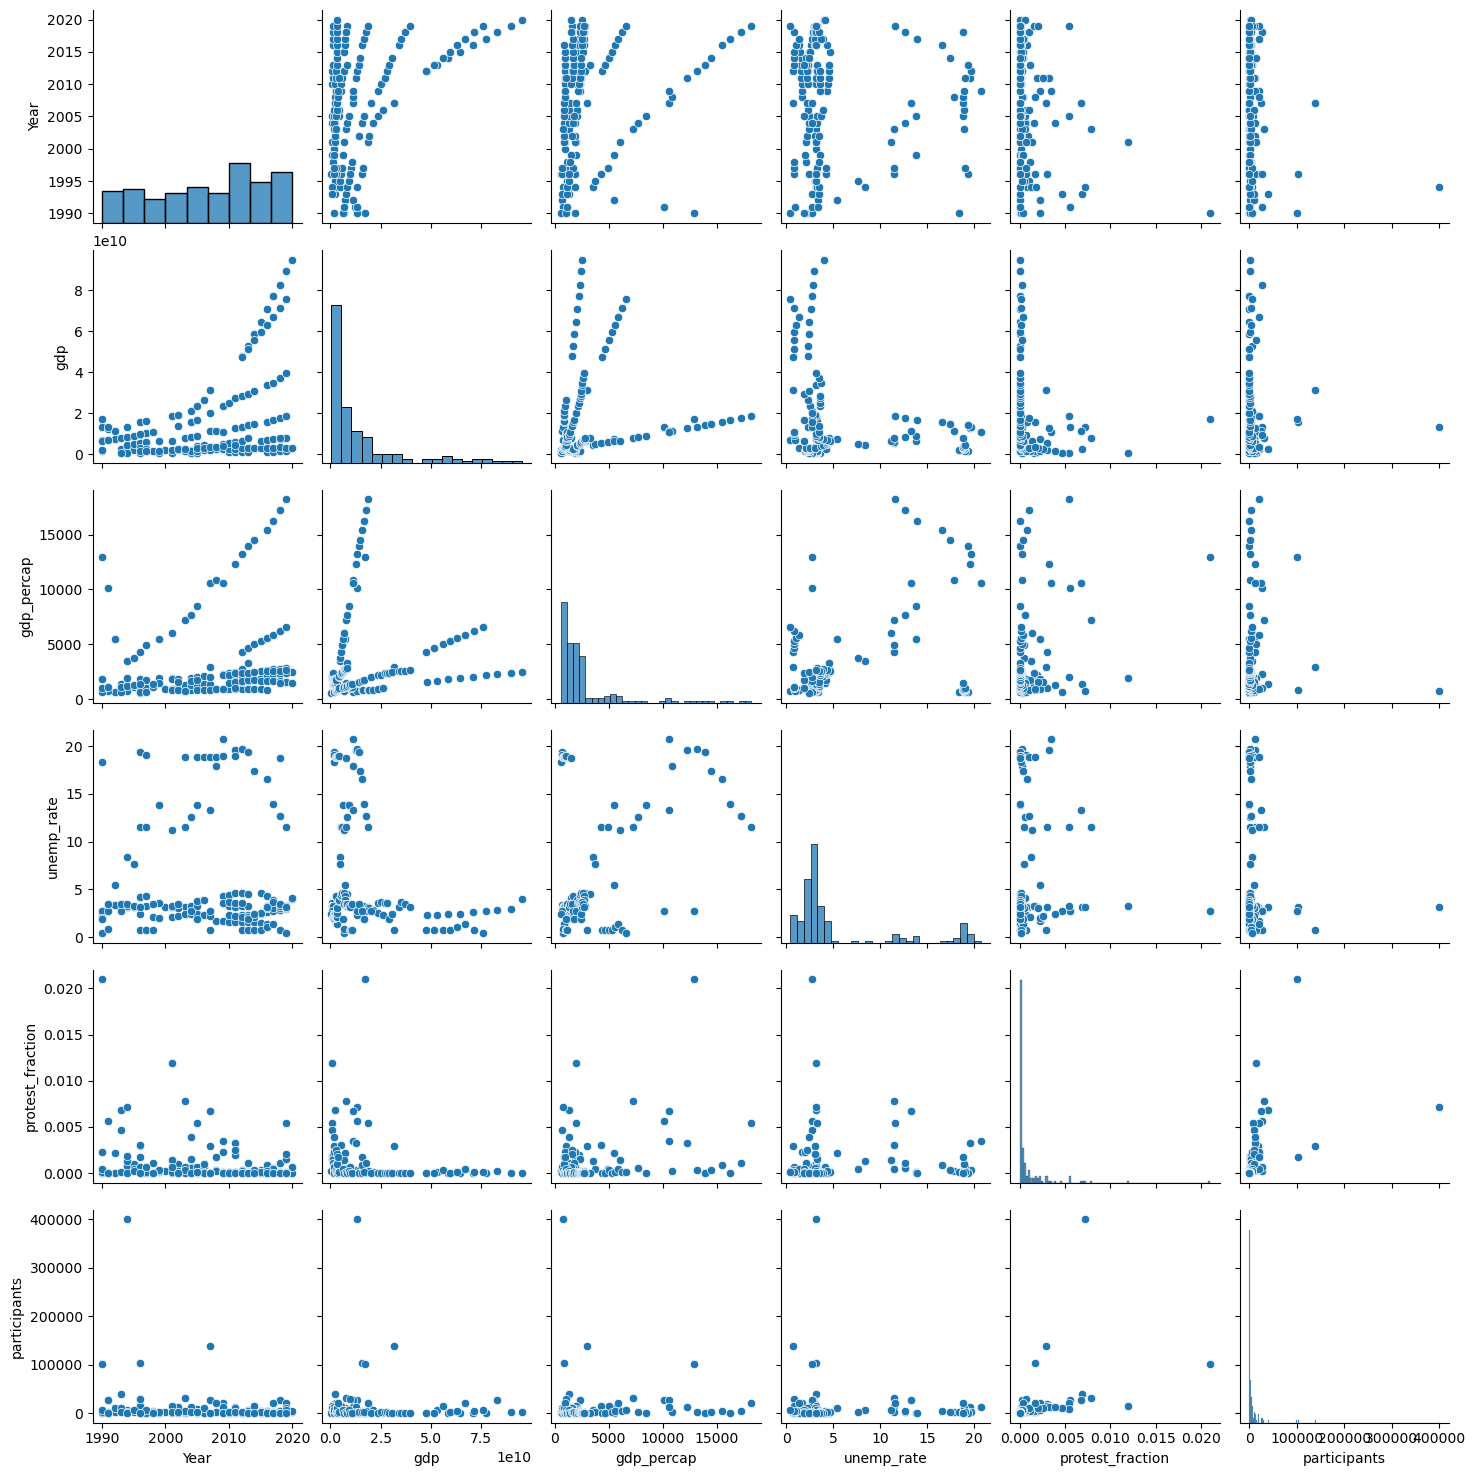

In [26]:
features = ['Year', 'gdp', 'gdp_percap', 'unemp_rate', 'protest_fraction', 'participants']
sns.pairplot(high_df[features])

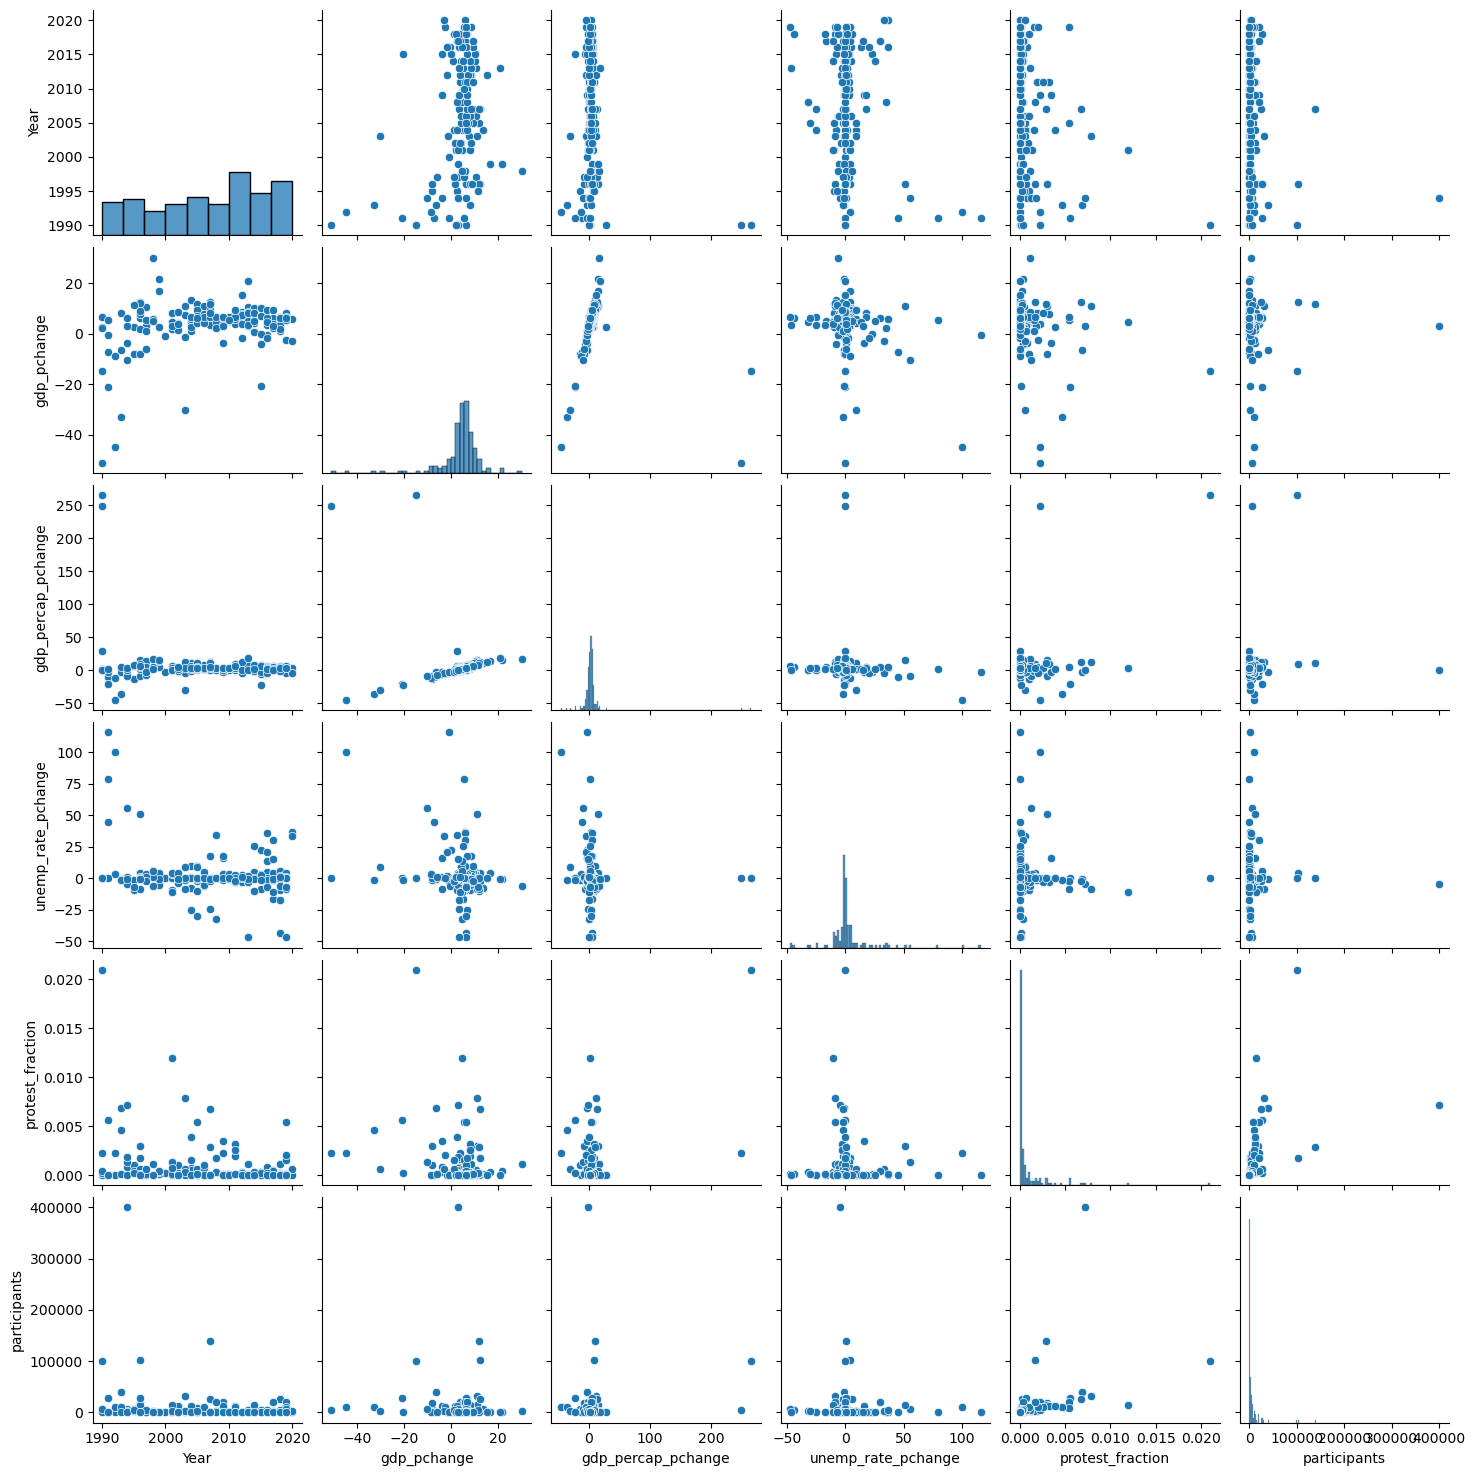

In [ ]:
fchg_eatures = ['Year', 'gdp_pchange', 'gdp_percap_pchange', 'unemp_rate_pchange', 'protest_fraction', 'participants']
sns.pairplot(high_df[chg_features])

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_squared_error

In [40]:
#further subset to only include data from 1990
high_df = high_df[high_df['Year']>1989]
reg_feats= ['Year', 'gdp', 'gdp_percap', 'unemp_rate', 'population']

lr = LinearRegression()
lr.fit(high_df[reg_feats], high_df['participants'])
lr.coef_

array([-7.27037347e+02, -4.83988020e-07,  2.17302372e+00, -5.82814432e+02,
        4.81374436e-04])

In [38]:

#create ridge and lasso pipes
ridge_pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
lasso_pipe = Pipeline([('scale', StandardScaler()), ('lasso', Lasso())])

# Fit the models to the training data
lr.fit(high_df[reg_feats], high_df['participants'])
ridge_pipe.fit(high_df[reg_feats], high_df['participants'])
lasso_pipe.fit(high_df[reg_feats], high_df['participants'])

# Find the model predictions on the training set
lr_preds = lr.predict(high_df[reg_feats])
ridge_preds = ridge_pipe.predict(high_df[reg_feats])
lasso_preds = lasso_pipe.predict(high_df[reg_feats])

# Find the mse on the training set
lr_rmse = root_mean_squared_error(high_df['participants'], lr_preds)
ridge_rmse = root_mean_squared_error(high_df['participants'], ridge_preds)
lasso_rmse = root_mean_squared_error(high_df['participants'], lasso_preds)
# Results
print(f"OLS Training MSE: {lr_rmse}")
print(f"Ridge Training MSE: {ridge_rmse}")
print(f"Lasso Training MSE: {lasso_rmse}")

OLS Training MSE: 33947.54286764602
Ridge Training MSE: 33949.370950092685
Lasso Training MSE: 33947.54334335075


In [34]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]
coefs = np.zeros((len(alphas), 4))
for i,alpha in enumerate(alphas):
    # Make a pipeline where you first scale and then lasso.
    # Use max_iter=100000 in your Lasso to avoid some convergence issues.
    lasso_pipe = Pipeline([('scale', StandardScaler()),('lasso', Lasso(alpha = alpha, max_iter=100000))])

    # Fit it to data
    lasso_pipe.fit(high_df[reg_feats], high_df['participants'])

    # Store the coefficients in the ith row of coefs 
    coefs[i,:] = lasso_pipe['lasso'].coef_

pd.DataFrame(coefs)

,0,1,2,3
0,-8648.228212,3277.044567,3767.860220,-2777.819722
1,-8648.228039,3277.044466,3767.860034,-2777.819565
2,-8648.226306,3277.043449,3767.858168,-2777.818005
3,-8648.208977,3277.033282,3767.839514,-2777.802404
4,-8648.036884,3276.933297,3767.651637,-2777.645436
5,-8646.313579,3275.930160,3765.775452,-2776.077604
6,-8629.068424,3265.883723,3747.024815,-2760.407444
7,-8455.194943,3163.390514,3561.133345,-2604.852413
8,-6716.587456,2138.644539,1702.068933,-1049.196213
